In [63]:
import pandas as pd
import numpy as np
from src.utils.data_utils import *
from matplotlib import pyplot as plt

## Loading the "_CMU Movie Summary Corpus_" dataset

In [64]:
# Giving an appropriate name to the columns
movie_headers = ["Wikipedia movie ID", "Freebase movie ID", "Movie name", "Movie release date", "Movie box office revenue", "Movie runtime", "Movie languages", "Movie countries", "Movie genres"]
movie_headers = [header.lower().replace(' ', '_') for header in movie_headers]

In [65]:
# Loading the CMU Movie Dataset
movies_df = pd.read_csv("./data/MovieSummaries/movie.metadata.tsv", sep="\t", header=None, names=movie_headers)
print_df_size("MoviesSummaries", movies_df)
movies_df.head(10)

MoviesSummaries - shape: (81741, 9) --> 81741 rows and 9 columns


,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
5,13696889,/m/03cfc81,The Gangsters,1913-05-29,NaN,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen..."
6,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
8,9997961,/m/06_y2j7,Contigo y aquí,1974,NaN,NaN,"{""/m/06nm1"": ""Spanish Language""}","{""/m/0jgd"": ""Argentina""}","{""/m/04t36"": ""Musical"", ""/m/07s9rl0"": ""Drama"",..."
9,2345652,/m/075f66,City of the Dead,1960,NaN,76.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/03npn"": ""Horror"", ""/m/0fdjb"": ""Supernatur..."


In [66]:
movies_df.isna().sum().to_frame()

,0
wikipedia_movie_id,0
freebase_movie_id,0
movie_name,0
movie_release_date,6902
movie_box_office_revenue,73340
movie_runtime,20450
movie_languages,0
movie_countries,0
movie_genres,0


## Loading the "_TMDB_" dataset

In [67]:
# Loading the TMDB Movie Dataset
tmdb_movies_df = pd.read_csv("./data/TMDBMovies/TMDB_movie_dataset_v11.csv")
print_df_size("TMDB", tmdb_movies_df)
tmdb_movies_df.head()

TMDB - shape: (1133053, 24) --> 1133053 rows and 24 columns


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [68]:
tmdb_movies_df.isna().sum().to_frame()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,185429
revenue,0
runtime,0
adult,0
backdrop_path,832115


## Merging the "_CMU Movie Summary Corpus_" with the "_TMDB_" datasets

In [69]:
# Loading the Converter Dataset and merging it with the TMDB datasets on the freebase ids
query_df = pd.read_csv("./data/Converter/query.csv", sep=',', header=0)
tmdb_with_ids_df = tmdb_movies_df.merge(query_df, how='inner', on='imdb_id')
full_merged = pd.merge(movies_df, tmdb_with_ids_df, left_on='freebase_movie_id', right_on='freebase_id', how='inner')
print_df_size("CMU & TMDB", full_merged)
full_merged

CMU & TMDB - shape: (68396, 34) --> 68396 rows and 34 columns


,wikipedia_movie_id,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,id,...,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,freebase_id
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",10016,...,"In 2176, a Martian police unit is sent to pick...",14.189,/i2zztssCIbahGES1fdfWFmDXian.jpg,Terror is the same on any planet.,"Action, Horror, Science Fiction","Animationwerks, Screen Gems, Storm King Produc...",United States of America,English,"future, planet mars, anti hero, possession, ho...",/m/03vyhn
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",784579,...,Dramatization of the story behind the murder o...,0.600,NaN,NaN,"Drama, Crime",NaN,United States of America,English,"colorado, jonbenet",/m/08yl5d
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",396302,...,A stolen bicycle case ends with drunken detect...,0.898,/rtFEOQQ0LVDv7y2bCgVVg3wWpXK.jpg,A film about murder and love,"Mystery, Crime, Drama","Filmeffekt AS, Norsk Film",Norway,Norwegian,"bicycle, private detective",/m/0crgdbh
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",33592,...,"In a wealthy and isolated desert community, a ...",8.297,/aLFoGmQpknOvcyx4imCP7Fuvoip.jpg,No woman is safe… while he is loose!,"Horror, Thriller",Mrs. White's Productions,United Kingdom,English,"based on novel or book, gas station, psychopat...",/m/0285_cd
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",11192,...,"Eva, an upper-class housewife, frustratedly le...",2.801,/iKeCVR0x8vnRXLtjwjZ7EuVFlo7.jpg,NaN,Drama,Dieter Geissler Filmproduktion,Germany,German,"jealousy, eroticism, gigolo, longing, dominatr...",/m/01mrr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68391,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",117124,...,A story that imagines how these real-world phe...,2.728,/xFGoPjzRXSDWUcnpFacrLOo7KF1.jpg,NaN,Science Fiction,DSP,United States of America,English,"mermaid, mockumentary, fake documentary",/m/0j7hxnt
68392,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",71771,...,An epic 12-year journey into the brutal and se...,1.656,/b93xbrz5kVYn5LUgHOznkaf5BvH.jpg,Twelve years. Three clans. One war.,Documentary,"Fís Éireann/Screen Ireland, Rise Films, BBC St...",Ireland,English,"sports, bare knuckle boxing, fistfight",/m/0g4pl34
68393,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",285337,...,Nixon and Agnew played as Laurel and Hardy.,2.087,/pEbRbvMjFsTYcFGPuIwuscwxixJ.jpg,America's funniest comedy team of the decade.....,Comedy,Smo-Bro International Productions,United States of America,English,NaN,/m/02pygw1
68394,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/

In [70]:
# Dropping unnecessary columns
columns_to_drop = [
    "wikipedia_movie_id",
    "movie_runtime",
    "movie_languages",
    "title",
    "status",
    "runtime",
    "adult",
    "backdrop_path",
    "budget",
    "homepage",
    "original_language",
    "original_title",
    "overview",
    "poster_path",
    "tagline",
    "production_companies",
    "spoken_languages",
    "keywords",
    "freebase_id",
    "id",
    "imdb_id"
]
full_reduced = full_merged.drop(columns=columns_to_drop)
full_reduced.head()

,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_countries,movie_genres,vote_average,vote_count,release_date,revenue,popularity,genres,production_countries
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",5.127,977,2001-08-24,14010832,14.189,"Action, Horror, Science Fiction",United States of America
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",0.000,0,2000-02-16,0,0.600,"Drama, Crime",United States of America
2,/m/0crgdbh,Brun bitter,1988,NaN,"{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",0.000,0,1988-11-17,0,0.898,"Mystery, Crime, Drama",Norway
3,/m/0285_cd,White Of The Eye,1987,NaN,"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",5.742,64,1987-06-19,0,8.297,"Horror, Thriller",United Kingdom
4,/m/01mrr1,A Woman in Flames,1983,NaN,"{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",5.300,13,1983-05-11,0,2.801,Drama,Germany


In [71]:
# Cleaning the columns that contain dictionaries
full_reduced["movie_countries_cleaned"] = full_reduced["movie_countries"].apply(lambda x: list(dict(eval(x)).values()))
full_reduced["movie_genres_cleaned"] = full_reduced["movie_genres"].apply(lambda x: list(dict(eval(x)).values()))
full_reduced["movie_countries_cleaned"] = full_reduced["movie_countries_cleaned"].apply(lambda x: np.nan if x == [] else ', '.join(map(str, x)) if isinstance(x, list) else x)
full_reduced["movie_genres_cleaned"] = full_reduced["movie_genres_cleaned"].apply(lambda x: np.nan if x == [] else ', '.join(map(str, x)) if isinstance(x, list) else x)
full_reduced.head()

,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,movie_countries,movie_genres,vote_average,vote_count,release_date,revenue,popularity,genres,production_countries,movie_countries_cleaned,movie_genres_cleaned
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",5.127,977,2001-08-24,14010832,14.189,"Action, Horror, Science Fiction",United States of America,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,"{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",0.000,0,2000-02-16,0,0.600,"Drama, Crime",United States of America,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,/m/0crgdbh,Brun bitter,1988,NaN,"{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",0.000,0,1988-11-17,0,0.898,"Mystery, Crime, Drama",Norway,Norway,"Crime Fiction, Drama"
3,/m/0285_cd,White Of The Eye,1987,NaN,"{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",5.742,64,1987-06-19,0,8.297,"Horror, Thriller",United Kingdom,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,/m/01mrr1,A Woman in Flames,1983,NaN,"{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",5.300,13,1983-05-11,0,2.801,Drama,Germany,Germany,Drama


In [72]:
# Combining and dropping the original columns
full_reduced['movie_countries_final'] = full_reduced['movie_countries_cleaned'].combine_first(full_reduced['production_countries'])
full_reduced['movie_genres_final'] = full_reduced['movie_genres_cleaned'].combine_first(full_reduced['genres'])
columns_to_drop = ['movie_countries_cleaned', 'production_countries', "movie_countries", 'movie_genres_cleaned', 'movie_genres', 'genres']
full_reduced.drop(columns=columns_to_drop, inplace=True)
full_reduced.head()

,freebase_movie_id,movie_name,movie_release_date,movie_box_office_revenue,vote_average,vote_count,release_date,revenue,popularity,movie_countries_final,movie_genres_final
0,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,5.127,977,2001-08-24,14010832,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,0.000,0,2000-02-16,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama"
2,/m/0crgdbh,Brun bitter,1988,NaN,0.000,0,1988-11-17,0,0.898,Norway,"Crime Fiction, Drama"
3,/m/0285_cd,White Of The Eye,1987,NaN,5.742,64,1987-06-19,0,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller"
4,/m/01mrr1,A Woman in Flames,1983,NaN,5.300,13,1983-05-11,0,2.801,Germany,Drama


In [73]:
# combine the redundant columns and ensure that we keep the maximum amount of information
full_reduced['combined_release_date'] = full_reduced['movie_release_date'].combine_first(full_reduced['release_date'])
full_reduced.drop(columns=['movie_release_date', 'release_date'], inplace=True)
full_reduced.head()

,freebase_movie_id,movie_name,movie_box_office_revenue,vote_average,vote_count,revenue,popularity,movie_countries_final,movie_genres_final,combined_release_date
0,/m/03vyhn,Ghosts of Mars,14010832.0,5.127,977,14010832,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,0.000,0,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16
2,/m/0crgdbh,Brun bitter,NaN,0.000,0,0,0.898,Norway,"Crime Fiction, Drama",1988
3,/m/0285_cd,White Of The Eye,NaN,5.742,64,0,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987
4,/m/01mrr1,A Woman in Flames,NaN,5.300,13,0,2.801,Germany,Drama,1983


In [74]:
full_reduced["movie_box_office_revenue_nan"]=full_reduced["movie_box_office_revenue"].replace(0, np.nan)
full_reduced["revenue_nan"]= full_reduced["revenue"].replace(0, np.nan)
print(full_reduced["movie_box_office_revenue_nan"].isna().sum(), full_reduced["revenue_nan"].isna().sum())

60069 59434


In [75]:
# Doing the same trick for the box office revenue but by replacing 0 by nan first
#full_reduced["movie_box_office_revenue_nan"]=full_reduced["movie_box_office_revenue"].replace(0, np.nan)
#full_reduced["revenue_nan"]= full_reduced["revenue"].replace(0, np.nan)
full_reduced["Box_Office"] = full_reduced["movie_box_office_revenue_nan"].combine_first(full_reduced["revenue_nan"])
full_reduced.drop(columns=['movie_box_office_revenue', 'revenue', "movie_box_office_revenue_nan", "revenue_nan"], inplace=True)
full_reduced.head()

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983,NaN


In [76]:
full_reduced.isna().sum().to_frame()

,0
freebase_movie_id,0
movie_name,0
vote_average,0
vote_count,0
popularity,0
movie_countries_final,847
movie_genres_final,232
combined_release_date,62
Box_Office,56558


In [77]:
# Drop the rows with empty release dates or genres or countries in order to perform analysis
# We keep the one with empty box office revenue as we might have other information to compute its popularity
full_reduced = full_reduced.dropna(subset=['combined_release_date', 'movie_genres_final', 'movie_countries_final'])

In [82]:
print_df_size("full_reduced", full_reduced)
full_reduced.head()

full_reduced - shape: (67293, 9) --> 67293 rows and 9 columns


,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983,NaN


In [83]:
full_reduced.isna().sum().to_frame()

,0
freebase_movie_id,0
movie_name,0
vote_average,0
vote_count,0
popularity,0
movie_countries_final,0
movie_genres_final,0
combined_release_date,0
Box_Office,55477


In [80]:
#save it in a pickle file for faster loading
full_reduced.to_pickle("./data/CMU_and_TDB.pkl")

In [84]:
# Load the MovieLens dataset
added_movies = pd.read_json('./data/movie_dataset_public_final/raw/metadata_updated.json', lines=True)

In [101]:
#preparing the dataset for merging
added_movies["imdbId"] = added_movies["imdbId"].astype(str)
print(type(added_movies["imdbId"].iloc[0]))
print_df_size("MovieLens", added_movies)
added_movies.head()

<class 'str'>
MovieLens - shape: (84661, 6) --> 84661 rows and 6 columns


,title,directedBy,starring,avgRating,imdbId,item_id
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709,1
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605,113497,2
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",3.17146,113228,3
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",2.86824,114885,4
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",3.07620,113041,5


In [86]:
converter = pd.read_csv('./data/Converter/query.csv')
print_df_size("converter",converter)

converter - shape: (409064, 2) --> 409064 rows and 2 columns


In [102]:
converter["imdb_id"] = converter["imdb_id"].str[3:]
converter.head()

,imdb_id,freebase_id
0,930,/m/0282x
1,133,/m/09b6zr
2,496,/m/014d3
3,667,/m/01rgr
4,434,/m/0hgqwpj


In [88]:
merged_data = pd.merge(full_reduced, converter, left_on="freebase_movie_id", right_on="freebase_id", how='inner')

In [103]:
merged_data = merged_data.drop_duplicates(subset='freebase_movie_id', keep='first')
print_df_size("full_reduced after dropping duplicates", full_reduced)
merged_data.head()

full_reduced after dropping duplicates - shape: (67293, 9) --> 67293 rows and 9 columns


,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,freebase_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,/m/03vyhn
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN,245916,/m/08yl5d
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988,NaN,094806,/m/0crgdbh
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987,NaN,094320,/m/0285_cd
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983,NaN,083949,/m/01mrr1


In [104]:
added_movies.head()

,title,directedBy,starring,avgRating,imdbId,item_id
0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709,1
1,Jumanji (1995),Joe Johnston,"Jonathan Hyde, Bradley Pierce, Robin Williams,...",3.26605,113497,2
2,Grumpier Old Men (1995),Howard Deutch,"Jack Lemmon, Walter Matthau, Ann-Margret , Sop...",3.17146,113228,3
3,Waiting to Exhale (1995),Forest Whitaker,"Angela Bassett, Loretta Devine, Whitney Housto...",2.86824,114885,4
4,Father of the Bride Part II (1995),Charles Shyer,"Steve Martin, Martin Short, Diane Keaton, Kimb...",3.07620,113041,5


In [105]:
final_data = pd.merge(merged_data, added_movies, left_on='imdb_id', right_on="imdbId", how='left')
final_data.head()

,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,freebase_id,title,directedBy,starring,avgRating,imdbId,item_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,/m/03vyhn,Ghosts of Mars (2001),John Carpenter,"Natasha Henstridge, Ice Cube, Jason Statham, C...",2.35723,228333,4735.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN,245916,/m/08yl5d,NaN,NaN,NaN,NaN,NaN,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988,NaN,094806,/m/0crgdbh,NaN,NaN,NaN,NaN,NaN,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987,NaN,094320,/m/0285_cd,NaN,NaN,NaN,NaN,NaN,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983,NaN,083949,/m/01mrr1,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
columns_to_drop = ['title','directedBy', 'starring', 'imdbId', 'freebase_id']

In [106]:
filtered_final_data = final_data.drop(columns=columns_to_drop)
print_df_size("filtered final data", filtered_final_data)
filtered_final_data.head()

filtered final data - shape: (67232, 12) --> 67232 rows and 12 columns


,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,avgRating,item_id
0,/m/03vyhn,Ghosts of Mars,5.127,977,14.189,United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",2001-08-24,14010832.0,228333,2.35723,4735.0
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,0.000,0,0.600,United States of America,"Mystery, Biographical film, Drama, Crime Drama",2000-02-16,NaN,245916,NaN,NaN
2,/m/0crgdbh,Brun bitter,0.000,0,0.898,Norway,"Crime Fiction, Drama",1988,NaN,094806,NaN,NaN
3,/m/0285_cd,White Of The Eye,5.742,64,8.297,United Kingdom,"Thriller, Erotic thriller, Psychological thriller",1987,NaN,094320,NaN,NaN
4,/m/01mrr1,A Woman in Flames,5.300,13,2.801,Germany,Drama,1983,NaN,083949,NaN,NaN


In [94]:
#To work faster
filtered_final_data.to_pickle("./data/Three_Datasets_Combined.pkl")

In [95]:
Three_Datasets_Combined = pd.read_pickle("./data/Three_Datasets_Combined.pkl")

In [96]:
Three_Datasets_Combined.dropna(subset=['Box_Office', 'avgRating'], inplace=True)

In [ ]:
Three_Datasets_Combined.shape

(5574, 12)

In [ ]:
# reviews_df = pd.read_json('./data/movie_dataset_public_final/raw/reviews.json', lines=True)
# reviews_df.head(10)

,item_id,txt
0,172063,"one-shot record of a belly dancer; ""Carmencita..."
1,95541,Banging Away..; Thomas Edison and William K.L....
2,7065,unbelievable; I cannot understand how anyone c...
3,3739,I'm still starry-eyed from it; I saw this last...
4,1562,Failed on every Front; Joel Schumacher who did...
5,8977,"Poor Casting, Poor script Poor direction.; I h..."
6,2174,An Accomplished Tim Burton Movie; A Great Idea...
7,8947,"Very good; I saw ""The Grudge"" yesterday, and w..."
8,143027,This movie was stupid.; This movie was totally...
9,143027,. . . is a great movie.; Amazing! Finally Disn...


In [108]:
reviews_df.to_pickle('./data/reviews.pkl')

In [ ]:
# For faster loading and saving, we will save the dataframe as a pickle file
reviews_df = pd.read_pickle('./data/reviews.pkl')

,item_id,txt
0,172063,"one-shot record of a belly dancer; ""Carmencita..."
1,95541,Banging Away..; Thomas Edison and William K.L....
2,7065,unbelievable; I cannot understand how anyone c...
3,3739,I'm still starry-eyed from it; I saw this last...
4,1562,Failed on every Front; Joel Schumacher who did...
...,...,...
2624603,520,"Aims low, with hilarious results; ROBIN HOOD: ..."
2624604,8640,Worst epic of 2004; I usually love big epics i...
2624605,1377,superb Second Movie; I was glad to see that Ti...
2624606,26746,Seagal takes out the garbage; This is hard cor...


In [ ]:
reviews_df.head()

,item_id,txt
0,172063,"one-shot record of a belly dancer; ""Carmencita..."
1,95541,Banging Away..; Thomas Edison and William K.L....
2,7065,unbelievable; I cannot understand how anyone c...
3,3739,I'm still starry-eyed from it; I saw this last...
4,1562,Failed on every Front; Joel Schumacher who did...
...,...,...
2624603,520,"Aims low, with hilarious results; ROBIN HOOD: ..."
2624604,8640,Worst epic of 2004; I usually love big epics i...
2624605,1377,superb Second Movie; I was glad to see that Ti...
2624606,26746,Seagal takes out the garbage; This is hard cor...


In [126]:
reviews_df = reviews_df.reset_index()
merged_reviews = pd.merge(reviews_df, filtered_final_data, left_on='item_id', right_on='item_id', how='inner')
print_df_size("merged reviews", merged_reviews)
merged_reviews.isna().sum().to_frame()

merged reviews - shape: (1293917, 15) --> 1293917 rows and 15 columns


,0
level_0,0
index,0
item_id,0
txt,0
freebase_movie_id,0
movie_name,0
vote_average,0
vote_count,0
popularity,0
movie_countries_final,0


In [112]:
merged_reviews = merged_reviews.sort_values(by='item_id')

In [113]:
merged_reviews = merged_reviews.rename(columns={'txt': 'review'})
merged_reviews.head()

,index,item_id,review,freebase_movie_id,movie_name,vote_average,vote_count,popularity,movie_countries_final,movie_genres_final,combined_release_date,Box_Office,imdb_id,avgRating
506163,857149,1,The recent 3-D version of Toy Story just adds ...,/m/0dyb1,Toy Story,7.971,17152,78.404,United States of America,"Buddy film, Adventure, Children's/Family, Comp...",1995-11-19,361958736.0,114709,3.89146
828363,2044304,1,one of the best...; This is a film for all age...,/m/0dyb1,Toy Story,7.971,17152,78.404,United States of America,"Buddy film, Adventure, Children's/Family, Comp...",1995-11-19,361958736.0,114709,3.89146
828362,2044297,1,Absolute perfection!; Hard to believe it but t...,/m/0dyb1,Toy Story,7.971,17152,78.404,United States of America,"Buddy film, Adventure, Children's/Family, Comp...",1995-11-19,361958736.0,114709,3.89146
458561,747788,1,One of Pixar's finest that has you looking bac...,/m/0dyb1,Toy Story,7.971,17152,78.404,United States of America,"Buddy film, Adventure, Children's/Family, Comp...",1995-11-19,361958736.0,114709,3.89146
828360,2044290,1,Wonderful animated feature...; TOY STORY is on...,/m/0dyb1,Toy Story,7.971,17152,78.404,United States of America,"Buddy film, Adventure, Children's/Family, Comp...",1995-11-19,361958736.0,114709,3.89146


In [114]:
#To load it faster for our work
merged_reviews.to_pickle('./data/merged_data_with_reviews.pkl')

In [115]:
merged_reviews['review_length'] = merged_reviews['review'].apply(lambda x: len(x) if isinstance(x, str) else 0)
average_length = merged_reviews['review_length'].mean()
print(f"The average length of the reviews is {average_length:.2f} characters.")

The average length of the reviews is 1379.83 characters.


In [116]:
num_reviews_greater_1024 = merged_reviews[merged_reviews['review_length'] > 1024].shape[0]
total_reviews = merged_reviews.shape[0]
ratio_greater_1024 = num_reviews_greater_1024/total_reviews
print(f"The ratio of reviews greater than 1024 characters is {ratio_greater_1024:.2f}")

The ratio of reviews greater than 1024 characters is 0.50


In [117]:
num_reviews_greater_2000 = merged_reviews[merged_reviews['review_length'] > 2000].shape[0]
total_reviews = merged_reviews.shape[0]
ratio_greater_2000 = num_reviews_greater_2000/total_reviews
print(f"The ratio of reviews greater than 1024 characters is {ratio_greater_2000:.2f}")

The ratio of reviews greater than 1024 characters is 0.19


# Data Exploration

In [118]:
import pandas as pd
from matplotlib import pyplot as plt

In [119]:
filtered_final_data = pd.read_pickle('./data/Three_Datasets_Combined.pkl')

In [120]:
# Let's get all the genres of every movie to count the number of movies in each genre
filtered_final_data['movie_genres_final'] = filtered_final_data['movie_genres_final'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
# put the genres in a list
all_genres = [genre for sublist in filtered_final_data['movie_genres_final'] for genre in sublist]
print(all_genres)

['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western', 'Mystery', 'Biographical film', 'Drama', 'Crime Drama', 'Crime Fiction', 'Drama', 'Thriller', 'Erotic thriller', 'Psychological thriller', 'Drama', 'Short Film', 'Silent film', 'Indie', 'Black-and-white', 'Comedy', 'Musical', 'Comedy', 'Black-and-white', 'Musical', 'Drama', 'Comedy', 'Horror', 'Supernatural', 'Drama', 'Black-and-white', 'Crime Fiction', 'Thriller', 'Japanese Movies', 'World cinema', 'Action/Adventure', 'Romantic comedy', 'Ensemble Film', 'Comedy-drama', 'Drama', 'Comedy', 'Romantic drama', 'Romance Film', 'Costume drama', 'War film', 'Epic', 'Period piece', 'Drama', 'Film adaptation', 'Comedy', 'Science Fiction', 'Adventure', 'Animation', 'Short Film', 'Fantasy', 'Family Film', 'Action', 'Drama', "Children's/Family", 'Musical', 'Fantasy', 'Comedy', 'Drama', 'Family Film', "Children's Fantasy", 'Drama', 'Drama', 'Romance Film', 'Drama', 'Black-and-white', 'Thriller', 'Scien

In [133]:
# compute the number of movies in each genre
genre_counts = pd.Series(all_genres).value_counts()
genre_counts.head()

Drama              30186
Comedy             15155
Romance Film        9169
Thriller            8083
Black-and-white     8009
Name: count, dtype: int64

In [134]:
#There are too many catiegories, so we create an "other" one for the genres that are less frequent
threshold = genre_counts.sum() * 0.015
filtered_genres = genre_counts[genre_counts >= threshold]
other_count = genre_counts[genre_counts<threshold].sum()
filtered_genres['Other'] = other_count
filtered_genres = filtered_genres.sort_values(ascending=False)
filtered_genres.shape

(19,)

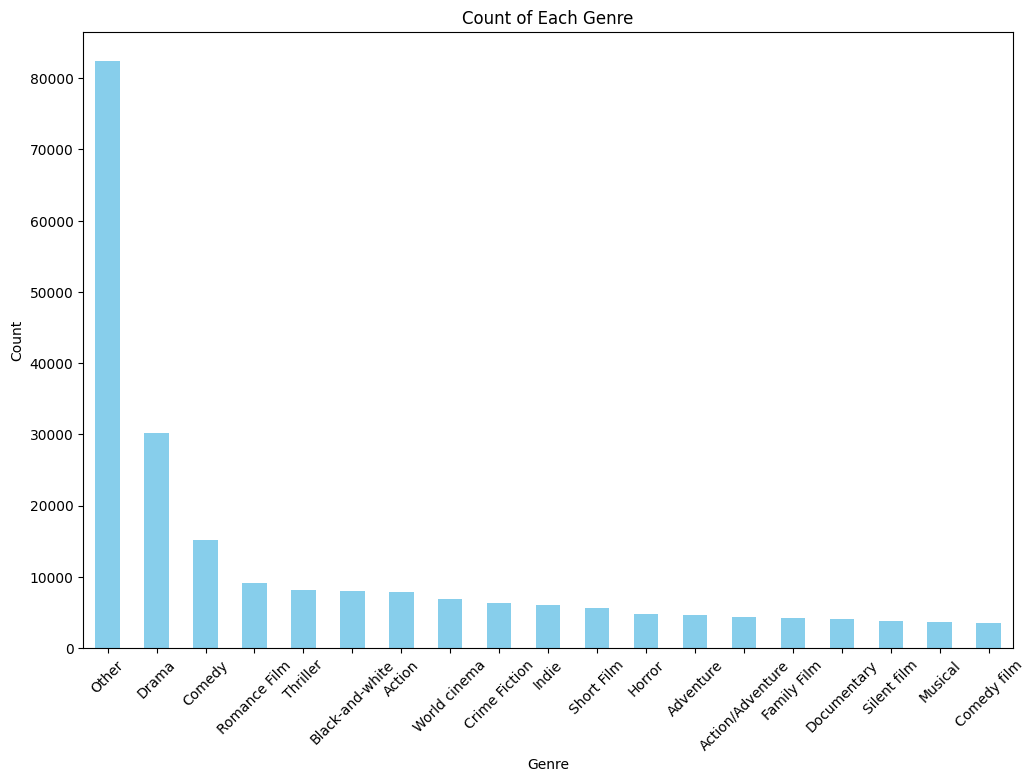

In [135]:

# Plotting the number of movies in each genre
plt.figure(figsize=(12, 8))
filtered_genres.plot.bar(color='skyblue')
plt.title('Count of Each Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

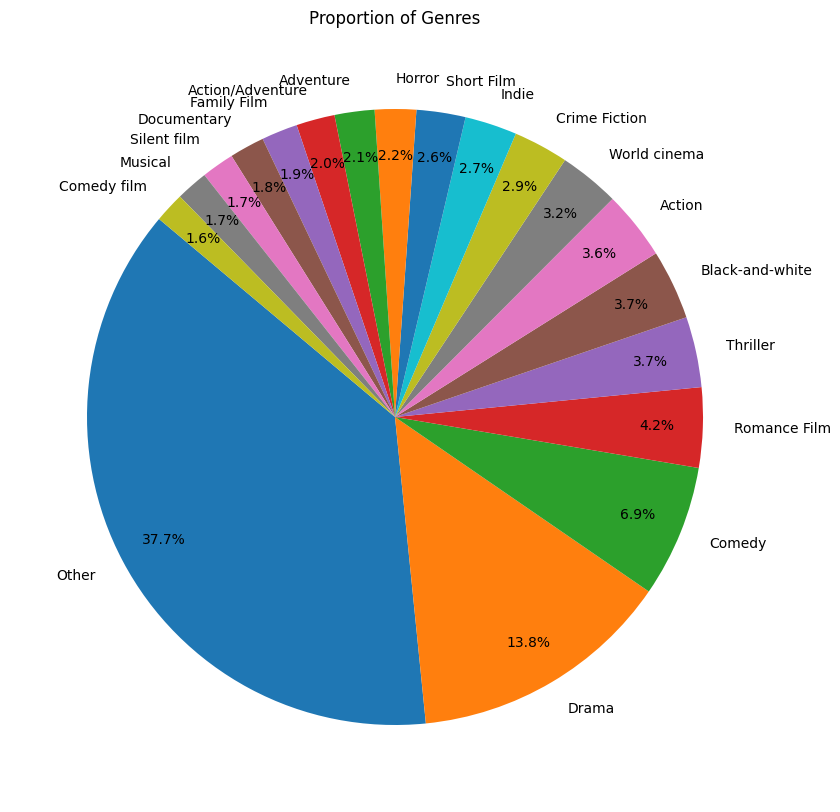

In [136]:
# Plotting the distribution of genres in a pie chart
plt.figure(figsize=(12, 10))
filtered_genres.plot.pie(autopct='%1.1f%%', startangle=140, pctdistance=0.85, labeldistance=1.1)
plt.title('Proportion of Genres')
plt.ylabel('')
plt.show()